Sentiment Analysis For Pupuk Competitor Company

In [1]:
# main.py
from ulasan_netafarm import scrape_netafarm
from ulasan_infarm import scrape_infarm
from produk_netafarm import scrape_prodnetafarm
import pandas as pd
import os

Scraping Data Netafarm

In [2]:
# Step 1: Ambil data dari Tokopedia
data_tokopedia = scrape_netafarm()

🚀 Memulai browser...
⏳ Menunggu halaman dimuat...
[['Pupuk Meroke Mikro Fitoflex - Kemasan original 2.5 gr', 'Baik', 'Netafarm'], ['PUPUK MEROKE MAG-S ( MgSO4 ) 1 kg', 'Baik', 'Netafarm'], ['HI-GRO - Nutrisi Hidroponik AB Mix Sayuran Daun 0,5 ltr / 275 gr', 'Bagus 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍', 'Netafarm'], ['Netpot 5cm Hitam + Flanel Sumbu Hidroponik ( Set 100pcs )', 'Bagus 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍', 'Netafarm'], ['Rockwool Vegetation Mats SPELAND VEGA 2,5x2,5x2,5cm 24 potong -1pcs', 'BAGUS 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍', 'Netafarm'], ['PH DOWN 250ml + Kandungan Nutrisi Phosphor untuk HIDROPONIK & AKUARIUM', 'Bagus 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍', 'Netafarm'], ['TDS Meter Digital - Alat Ukur PPM Air & Hidroponik', 'Bagus', 'Netafarm'], ['Tapetool Hand Tying Machine Alat Pengikat Lanjaran Tanaman+Paket Refil', 'Barang sampai dengan baik terima kasih kurir ya  sangat ramah', 'Netafarm'], ['PUPUK CAIR LIQUINOX START B1 ORIGINAL 470ml', 'Udah ke sekian kali order ditoko ini biasanya order pupuk vegetatif/generatif, sek

In [3]:

# Step 2: Lanjut scraping Shopee dan tambahkan ke data yang sama
final_data = scrape_infarm(data_tokopedia)


🚀 Memulai browser...
⏳ Menunggu halaman dimuat...
[['kayuan - Racun Pengusir Nyamuk Repellent ORGANIK Obat Pembasmi Nyamuk', 'pesan botol x 2 satu isinya putih yg lain kuning. kenapa beda? dapat loyalty card tapi klo scan error terus 🤔', 'Infarm'], ['Kayuan - Semprotan Air Kepala Selang Jetspray Watergun 7 Mode', 'barang sesuai pesanan, kualitas bagus, pengiriman cepat', 'Infarm'], ['Kayuan - Botol Spray Kosong Warna Warni 400 ML Alat Kebersihan Rumah', 'penjual penipu, barang tidak dikirim, hanya kepala spray saja yg ada, dg packing kecil. Jangan beli disini! (jika barang dikirim akan saya ubah penilaianya)', 'Infarm'], ['kayuan - Pengusir Semut ORGANIK Spray repellent Anti Semut & Serangga', 'Beli pengusir semut, cicak dan nyamuk. Lumayan ampuh ramuannya, tapi saya beri bintang 4 karena botol2 spraynya berkualitas buruk. Seandainya botol2 spraynya juga oke, bi... ', 'Infarm'], ['kayuan - Racun Pengusir Kecoa Repellent ORGANIK Obat Pembasmi Kecoa', 'ok sih.\nagak pedes kalau kehirup h

In [4]:

produk_netafarm = scrape_prodnetafarm()

🚀 Memulai browser...
⏳ Menunggu halaman dimuat...
[['Weedmat NOGULMA Geotextile Mulsa Gulma Hitam 90 GSM 4x100m - Roll', 'Rp1.785.000'], ['Weedmat Control Terpal Mulsa Anti Rumput Hitam EG Lebar 0,8mx100m-Roll', 'Rp492.200'], ['Weedmat NOGULMA Geotextile Mulsa Gulma Hitam 100 GSM 4x100m - Roll', 'Rp2.166.800'], ['Pupuk Organik JIMMY HANTU Ratu Biogen ZPT Hormon Pertumbuhan 1000ml Putih Tanaman', 'Rp104.900'], ['Gunting Tanaman Daun Ranting Dahan Alat Berkebun DUA WARNA -1pcs - Kuning', 'Rp36.700'], ['Pot Bunga / Tanaman Hias Warna Hitam No 30', 'Rp7.000'], ['Weedmat Control Terpal Mulsa Anti Rumput Hitam EG Lebar 1,2mx50m -Roll', 'Rp375.000'], ['Impraboard ( Tanpa Lubang ) Dimensi : 31cm x 39cm x 3mm -1pc', 'Rp6.200'], ['Weedmat NOGULMA Geotextile Mulsa Gulma Hitam 90 GSM 4x100m - 1 Meteran', 'Rp22.000'], ['Pupuk Boron Borate 46% INABOR 10 Masa Pembuahan - 1 Kg', 'Rp38.600'], ['Polybag / Polibag Tanaman Plastik PE Hitam 08mc 30/15x30cm - 500gr Pot Cabai Media', 'Rp16.900'], ['Weedmat T

In [5]:
df_ulasan = pd.DataFrame(final_data, columns=["Produk", "Ulasan", "Perusahaan"])
print(df_ulasan)

                                                Produk  \
0    Pupuk Meroke Mikro Fitoflex - Kemasan original...   
1                    PUPUK MEROKE MAG-S ( MgSO4 ) 1 kg   
2    HI-GRO - Nutrisi Hidroponik AB Mix Sayuran Dau...   
3    Netpot 5cm Hitam + Flanel Sumbu Hidroponik ( S...   
4    Rockwool Vegetation Mats SPELAND VEGA 2,5x2,5x...   
..                                                 ...   
99   Kayuan - Pengusir Tikus ORGANIK Spray Repellen...   
100  Kayuan - Pengusir Cicak ORGANIK Spray Repellen...   
101  Kayuan - Racun Pengusir Kecoa Repellent ORGANI...   
102  Kayuan - Selang Ajaib Elastis Memanjang Magic ...   
103  Kayuan - Pengusir Tikus ORGANIK Spray Repellen...   

                                                Ulasan Perusahaan  
0                                                 Baik   Netafarm  
1                                                 Baik   Netafarm  
2                          Bagus 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍   Netafarm  
3                              

In [6]:
df_produk = pd.DataFrame(produk_netafarm, columns=["Nama Produk", "Harga"])
print(df_produk)

                                           Nama Produk        Harga
0    Weedmat NOGULMA Geotextile Mulsa Gulma Hitam 9...  Rp1.785.000
1    Weedmat Control Terpal Mulsa Anti Rumput Hitam...    Rp492.200
2    Weedmat NOGULMA Geotextile Mulsa Gulma Hitam 1...  Rp2.166.800
3    Pupuk Organik JIMMY HANTU Ratu Biogen ZPT Horm...    Rp104.900
4    Gunting Tanaman Daun Ranting Dahan Alat Berkeb...     Rp36.700
..                                                 ...          ...
715  Media Tanam Kulit Pinus cacah PINE BARK ( 3 - ...     Rp15.000
716  Media Tanam Kulit Pinus cacah PINE BARK ( 1 - ...     Rp17.500
717  Media Tanam - TANAH MALANG HUMUS KOMPOS ORGANI...     Rp53.500
718  POT NURSERY ELASTIS Pembibitan Tanaman Coklat ...     Rp27.000
719  POT NURSERY ELASTIS Pembibitan Tanaman Coklat ...     Rp23.400

[720 rows x 2 columns]


In [7]:
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")
output_path = os.path.join(downloads_path, "gabungan_tokopedia_shopee.xlsx")

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_ulasan.to_excel(writer, sheet_name='Ulasan', index=False)
    df_produk.to_excel(writer, sheet_name='Produk', index=False)

print(f"\n✅ Semua data berhasil disimpan di: {output_path}")


✅ Semua data berhasil disimpan di: /Users/muhammaddzulfiqar/Downloads/gabungan_tokopedia_shopee.xlsx


Text Classification

In [8]:
from classification.preprocessing import classification_preprocessing

preprocessing = classification_preprocessing(output_path, df_ulasan, df_produk)
print(f"\n✅ Preprocessing data berhasil dilakukan")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               Produk  \
0   Pupuk Meroke Mikro Fitoflex - Kemasan original...   
1                   PUPUK MEROKE MAG-S ( MgSO4 ) 1 kg   
2   HI-GRO - Nutrisi Hidroponik AB Mix Sayuran Dau...   
3   Netpot 5cm Hitam + Flanel Sumbu Hidroponik ( S...   
4   Rockwool Vegetation Mats SPELAND VEGA 2,5x2,5x...   
..                                                ...   
74          Paket EM4 PETERNAKAN 1 Liter + MOLASE 1kg   
75                    Pupuk Mahkota Borate 46% - 1 kg   
76  Pupuk Meroke Boroni Kalsium Nitrat Kemasan Pab...   
77                            Flanel Sumbu Hidroponik   
78          Insektisida ABACEL 18ec Abamektin - 100ml   

                                               Ulasan Perusahaan  
0                                                Baik   Netafarm  
1                                                Baik   Netafarm  
2                         Bagus 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍   Netafarm  
3                             Bagus 👍👍👍👍👍👍👍👍👍👍👍

Downloading...
From: https://drive.google.com/uc?export=download&id=1lzuTJRSVOuQd1GEO7HjOfX0tEWQvqT3t
To: /Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/classification/slang_dict.txt
100%|██████████| 24.2k/24.2k [00:00<00:00, 2.59MB/s]


{'@': 'di', 'abg': 'remaja', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'aga': 'agak', 'agk': 'agak', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ampe': 'sampai', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'barng': 'barang', 'basbang': 'basi', 'batrai': 'baterai', 'bcanda': 'bercanda', 'bd': 'beda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'bel

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Kata ditemukan dalam lexicon dengan skor: -1
kata:  alhamdulillah
nilai lexicon: 0
score negatif:  0.0
score netral:  1.0
score positif:  0.0
score compound:  0.0
kata:  sesuai
nilai lexicon:  3
score negatif:  0.0
score netral:  0.0
score positif:  1.0
score compound:  0.6124
kata:  pesan
nilai lexicon: 0
score negatif:  0.0
score netral:  1.0
score positif:  0.0
score compound:  0.0
{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.6124}
kata:  alhamdulillah
nilai lexicon: 0
score negatif:  0.0
score netral:  1.0
score positif:  0.0
score compound:  0.0
kata:  sesuai
nilai lexicon:  3
score negatif:  0.0
score netral:  0.0
score positif:  1.0
score compound:  0.6124
kata:  pesan
nilai lexicon: 0
score negatif:  0.0
score netral:  1.0
score positif:  0.0
score compound:  0.0
{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.6124}
Positive

✅ Preprocessing data berhasil dilakukan


In [9]:
from classification.text_classification import textClassification
classification = textClassification(preprocessing)
print(f"\n✅ Klasifikasi data berhasil dilakukan")

Akurasi: 0.0
              precision    recall  f1-score   support

      Netral       0.00      0.00      0.00       2.0
     Positif       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

    Unnamed: 0.1  Unnamed: 0  \
0              0           0   
1              1           1   
2              2           2   
3              3           3   
4              4           4   
..           ...         ...   
74            74          74   
75            75          75   
76            76          76   
77            77          77   
78            78          78   

                                               Produk  \
0   Pupuk Meroke Mikro Fitoflex - Kemasan original...   
1                   PUPUK MEROKE MAG-S ( MgSO4 ) 1 kg   
2   HI-GRO - Nutrisi Hidroponik AB Mix Sayuran Dau...   
3   Netpot 5cm Hitam + Flanel Sumbu Hidroponik 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2939: UserWarning: labels size, 3, does not match size of target_names, 2
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2939: UserWarning: labels size, 3, does not match size of target_names, 2
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sent


Random Forest Classifier
Akurasi: 0.9
              precision    recall  f1-score   support

      Netral       0.71      1.00      0.83        10
     Positif       1.00      0.90      0.95        29

    accuracy                           0.90        40
   macro avg       0.57      0.63      0.59        40
weighted avg       0.90      0.90      0.89        40


Naive Bayes Classifier
Akurasi: 0.725
              precision    recall  f1-score   support

      Netral       0.00      0.00      0.00        10
     Positif       0.72      1.00      0.84        29

    accuracy                           0.72        40
   macro avg       0.24      0.33      0.28        40
weighted avg       0.53      0.72      0.61        40


K-Nearest Neighbors (KNN)
Akurasi: 0.725
              precision    recall  f1-score   support

      Netral       0.00      0.00      0.00        10
     Positif       0.72      1.00      0.84        29

    accuracy                           0.72        40
   macro

Visualization Data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/muhammaddzulfiqar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Akurasi: 0.5
              precision    recall  f1-score   support

     Negatif       0.50      1.00      0.67         1
      Netral       0.00      0.00      0.00         0
     Positif       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.17      0.33      0.22         2
weighted avg       0.25      0.50      0.33         2

    Unnamed: 0.1  Unnamed: 0  \
0             30          30   
1              0           0   
2             22          22   
3             31          31   
4             18          18   
5             28          28   
6             10          10   
7             70          70   
8              4           4   
9             12          12   
10            49          49   
11            33          33   
12            67          67   
13            35          35   
14            68          68   
15            45          45   
16            73          73   
17            61          61  

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
7 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/m

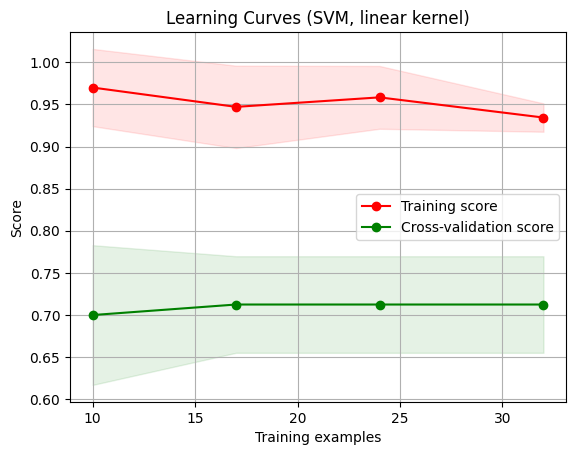

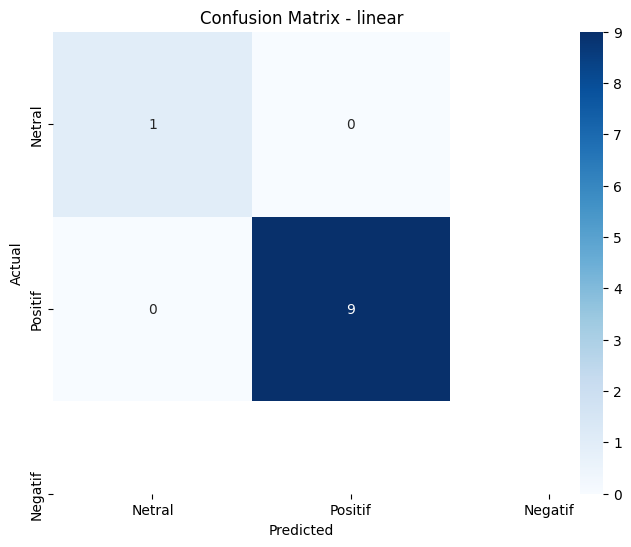

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads

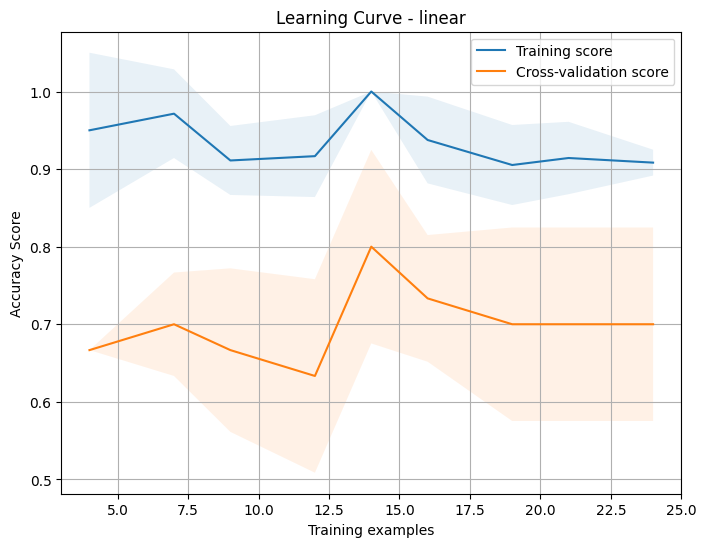

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
7 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/m

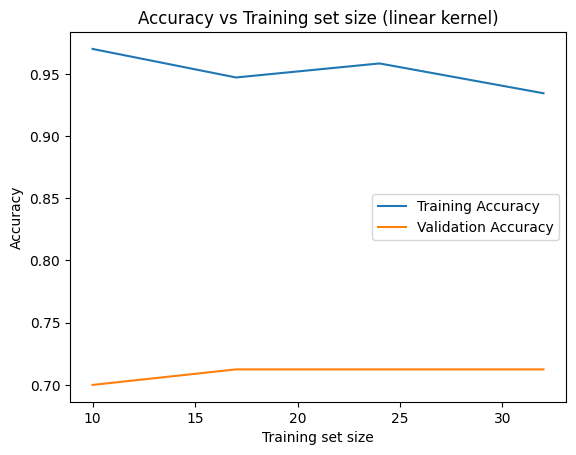


Kernel: rbf


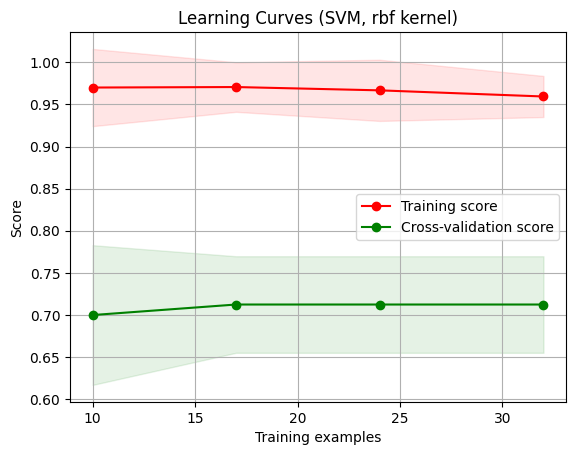

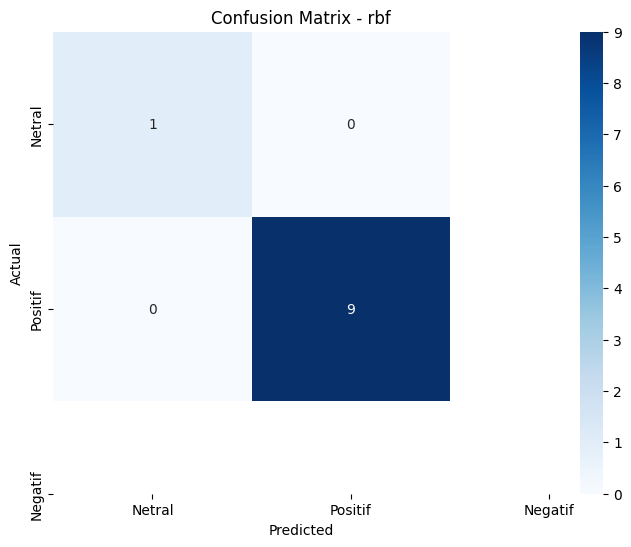

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads

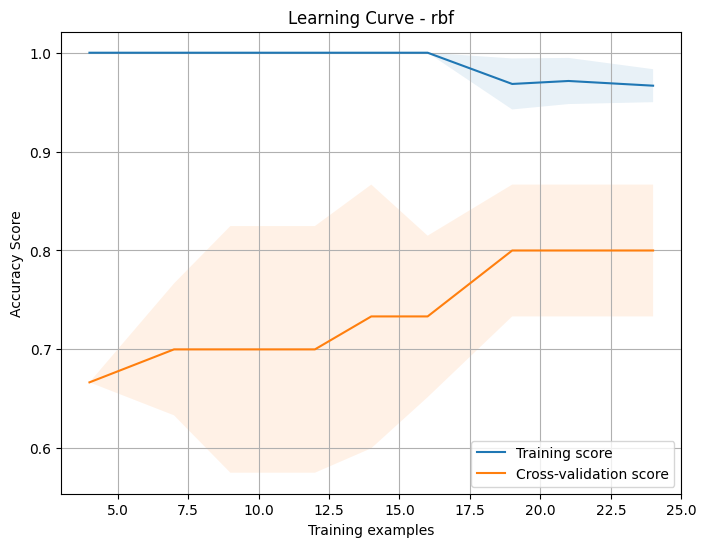

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
7 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/m

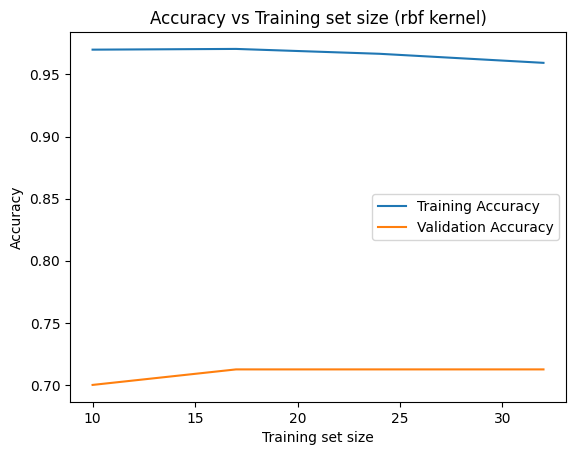


Kernel: poly


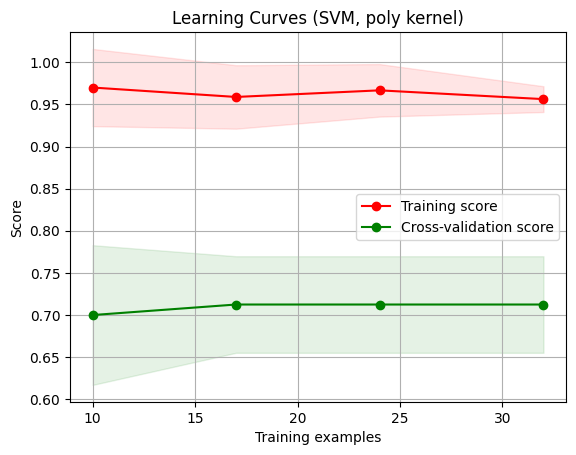

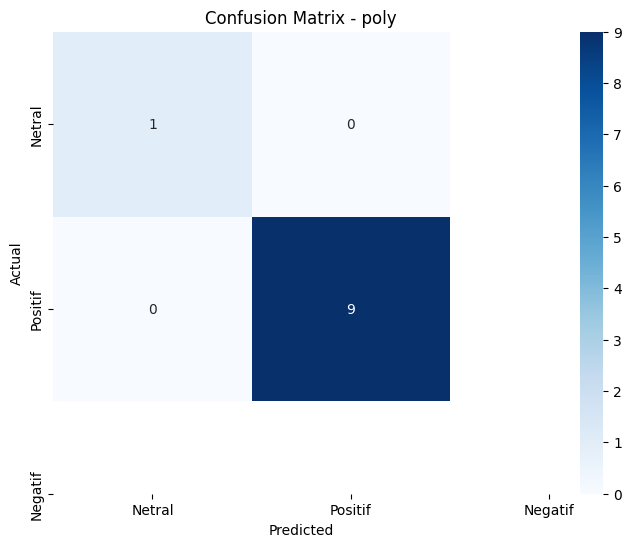

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads

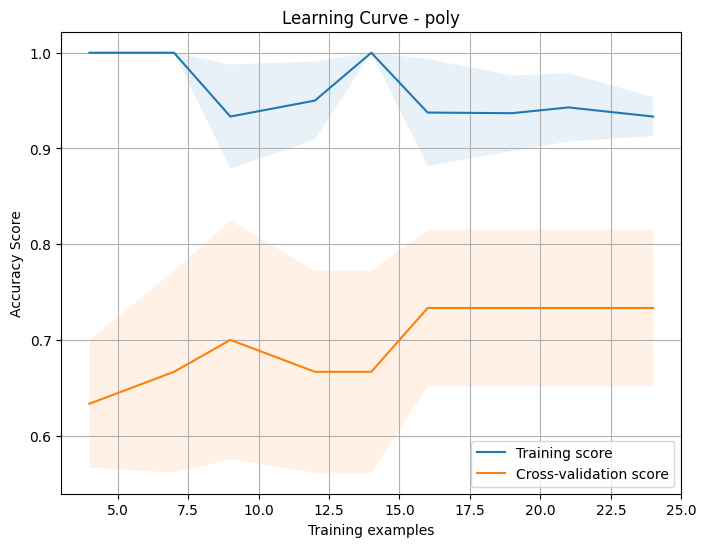

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
7 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/m

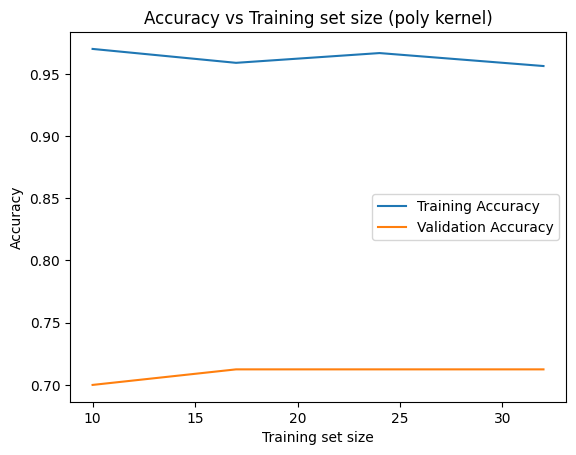


Kernel: sigmoid


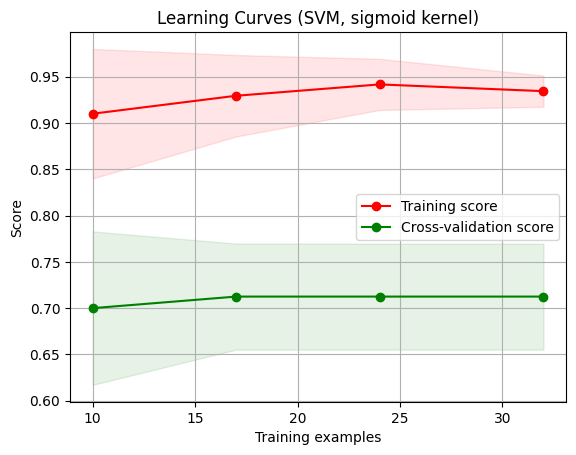

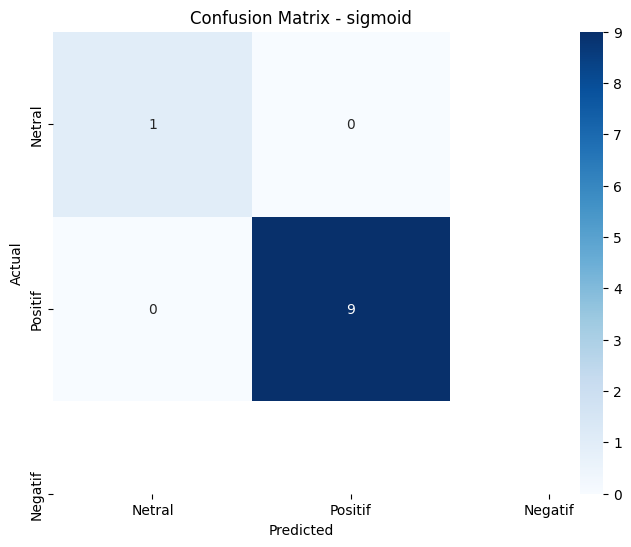

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads

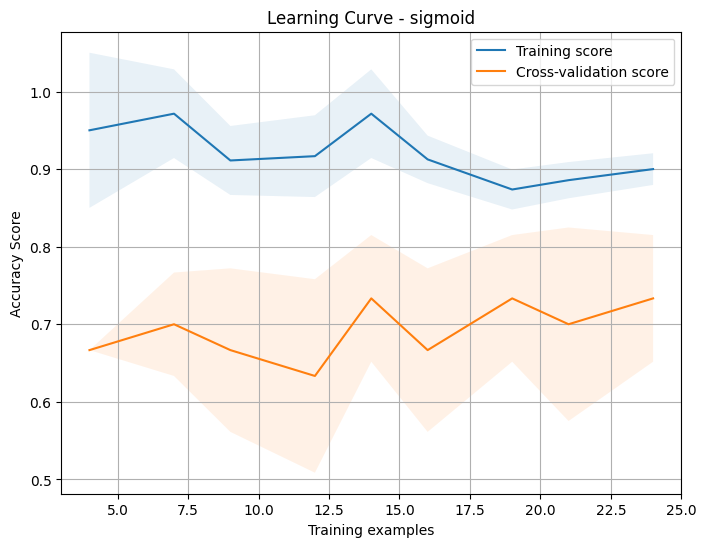

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
7 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/m

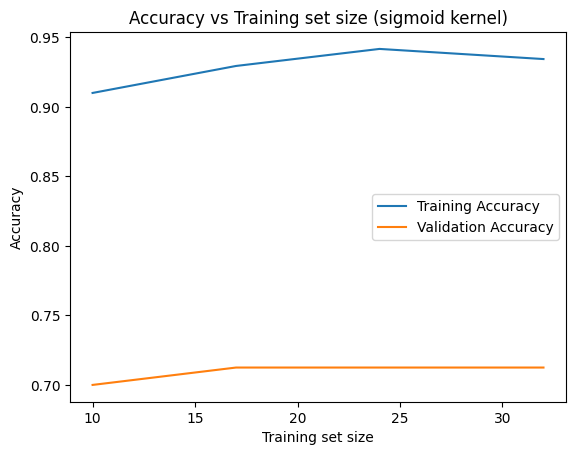


Kernel: linear


/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
3 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/m

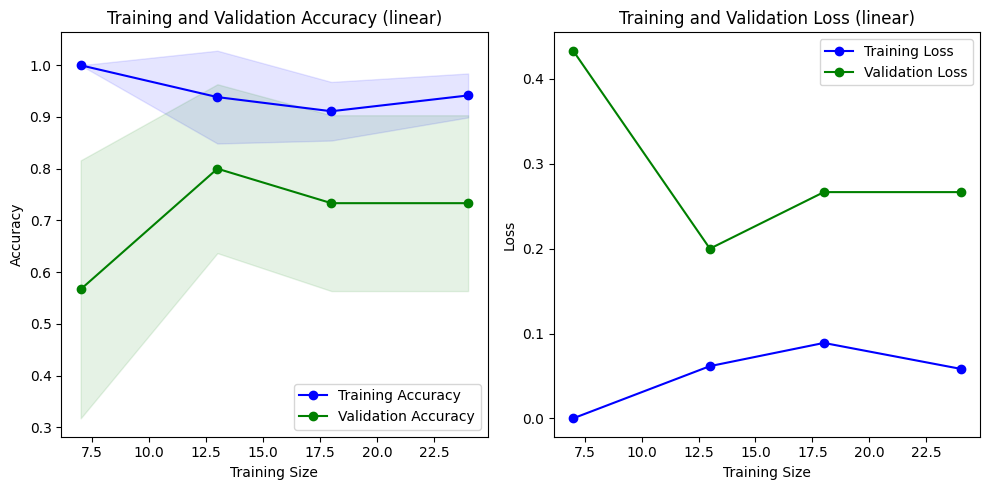


Kernel: rbf


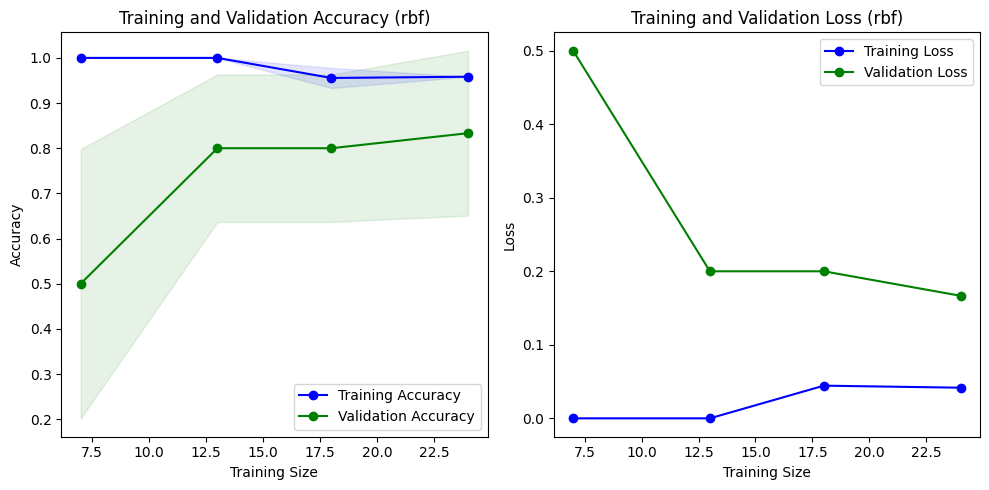


Kernel: poly


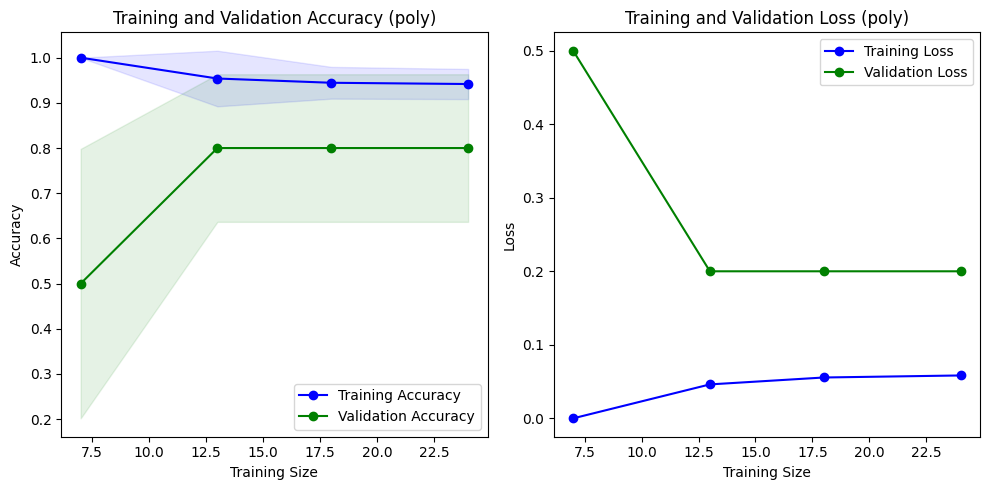


Kernel: sigmoid


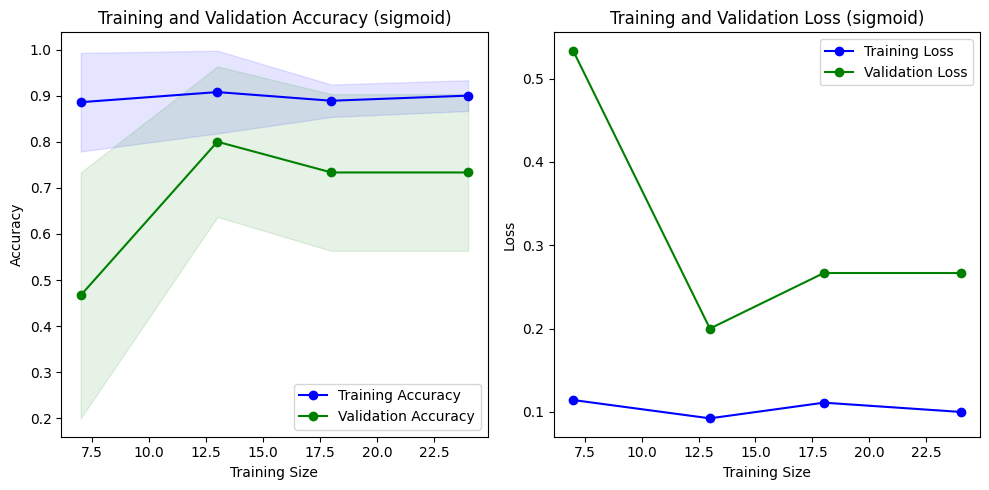

    Kernel  Training Accuracy  Validation Accuracy  Training Loss  \
0   linear           0.908333             0.700000       0.091667   
1      rbf           0.966667             0.800000       0.033333   
2     poly           0.933333             0.733333       0.066667   
3  sigmoid           0.900000             0.733333       0.100000   

   Validation Loss  
0         0.300000  
1         0.200000  
2         0.266667  
3         0.266667  
Logistic Regression
Akurasi: 1.0
              precision    recall  f1-score   support

      Netral       1.00      1.00      1.00         1
     Positif       1.00      1.00      1.00         9

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Random Forest Classifier
Akurasi: 0.8
              precision    recall  f1-score   support

      Netral       0.33      1.00      0.50         1
     Positif       1.00      0.78      0.

/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FIQAR DOCUMENT/Magang/Magenta PT Semen Indonesia 2025/Projek/Uji Sentiment Selenium/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/muhammaddzulfiqar/Downloads/My Document/FI

In [10]:
from classification.visualisasi_data import visualisasi
vizualitation = visualisasi(classification)
print(f"\n✅ visualisasi data berhasil dilakukan")

WORDCLOUD EXECUTION


Analisis untuk sentimen: POSITIF


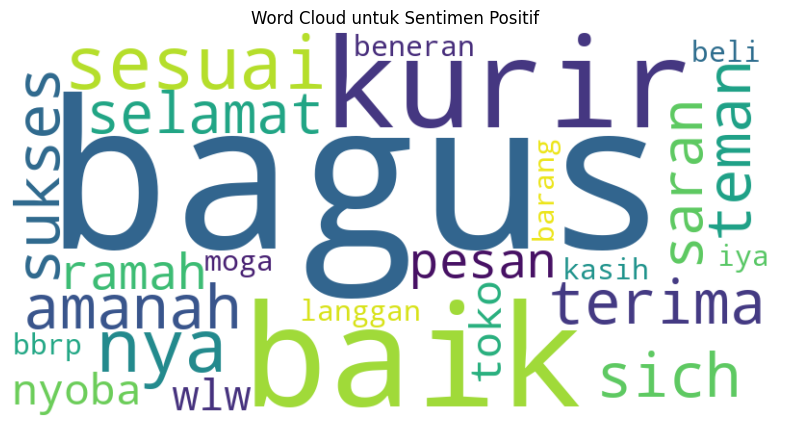


Analisis untuk sentimen: NETRAL


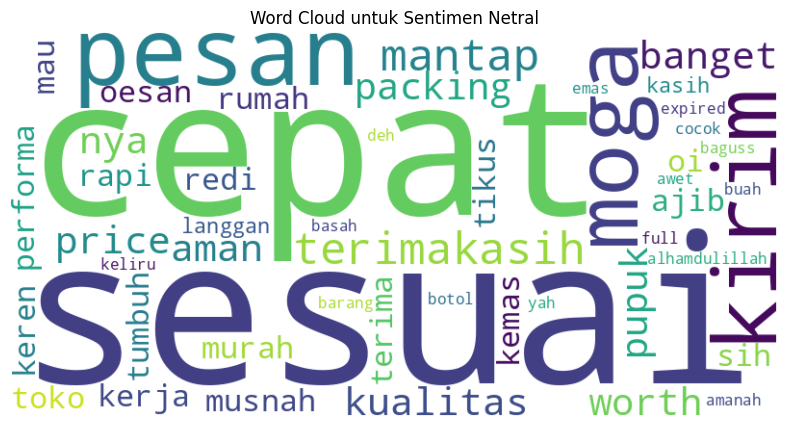


Analisis untuk sentimen: NEGATIF
Tidak ada data untuk sentimen 'negatif', dilewati.


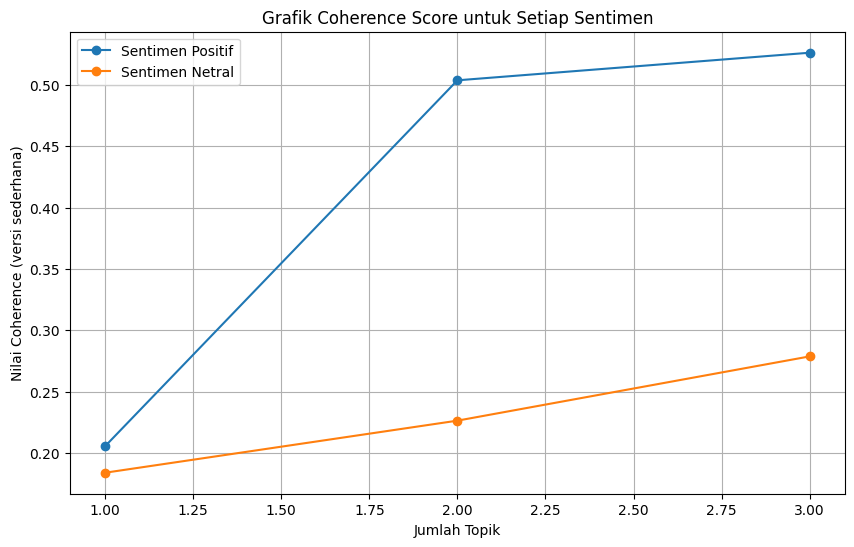


✅ Wordcloud berhasil dibuat


In [11]:
from classification.LDA_NER import LDAdanNER
LDA_NER = LDAdanNER(classification)
print(f"\n✅ Wordcloud berhasil dibuat")